In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd /content/drive/My Drive/Bengali_db

/content/drive/My Drive/Bengali_db


In [0]:
cp ttdata.zip /content/

In [15]:
!unzip ttdata.zip

Archive:  ttdata.zip
   creating: data/
   creating: data/train/
   creating: data/train/Bengali Female/
  inflating: data/train/Bengali Female/_2.jpg  
  inflating: data/train/Bengali Female/_50451259_nuzratjahan1.jpg  
  inflating: data/train/Bengali Female/_64627012_mentor.jpg  
  inflating: data/train/Bengali Female/_79533541_1c143da8-1013-4f12-b2db-becf34e8cd71.jpg  
  inflating: data/train/Bengali Female/_103791366_img_5716.jpg  
  inflating: data/train/Bengali Female/_105687929_hi052405936-1.jpg  
  inflating: data/train/Bengali Female/_106346936_img_4700.jpg  
  inflating: data/train/Bengali Female/_106347044_img_4728.jpg  
  inflating: data/train/Bengali Female/_106347681_img_5049.jpg  
  inflating: data/train/Bengali Female/0be4fc0abadf850c1246a82f76b22f14--artists.jpg  
  inflating: data/train/Bengali Female/0ce2459358a0ae9ec3564f10a7a82ef3--west-bengal-indian-beauty.jpg  
  inflating: data/train/Bengali Female/0ebbda56ff10ad3013c762b584cfb02f.jpg  
  inflating: data/train/B

In [16]:
cd data/

/content/data


In [17]:
ls

test/  train/


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

# image dimensions
img_width, img_height = 150, 150

train_data_dir = 'train'
validation_data_dir = 'test'
nb_train_samples = 3443
nb_validation_samples = 895
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [31]:
# augmentation configuration for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# augmentation configuration for testing: only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('myweights.h5')

Found 3443 images belonging to 2 classes.
Found 895 images belonging to 2 classes.
Epoch 1/50
 21/215 [=>............................] - ETA: 1:20 - loss: 0.7805 - acc: 0.5417

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 33685504 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 47185920 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2359296 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to re

 56/215 [======>.......................] - ETA: 58s - loss: 0.6933 - acc: 0.6083

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:2496: DecompressionBombWarning: Image size (139489119 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


 77/215 [=========>....................] - ETA: 54s - loss: 0.6816 - acc: 0.6185

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


215/215 [==============================] - 92s 430ms/step - loss: 0.6466 - acc: 0.6532 - val_loss: 0.5738 - val_acc: 0.7409
Epoch 2/50
215/215 [==============================] - 93s 432ms/step - loss: 0.5925 - acc: 0.6937 - val_loss: 0.5581 - val_acc: 0.7531
Epoch 3/50
215/215 [==============================] - 88s 409ms/step - loss: 0.5745 - acc: 0.7233 - val_loss: 0.5014 - val_acc: 0.7656
Epoch 4/50
215/215 [==============================] - 90s 419ms/step - loss: 0.5521 - acc: 0.7383 - val_loss: 0.5341 - val_acc: 0.7486
Epoch 5/50
215/215 [==============================] - 88s 411ms/step - loss: 0.5321 - acc: 0.7407 - val_loss: 0.5622 - val_acc: 0.7213
Epoch 6/50
215/215 [==============================] - 90s 418ms/step - loss: 0.5214 - acc: 0.7512 - val_loss: 0.4788 - val_acc: 0.7850
Epoch 7/50
215/215 [==============================] - 89s 414ms/step - loss: 0.5101 - acc: 0.7602 - val_loss: 0.4803 - val_acc: 0.7838
Epoch 8/50
215/215 [==============================] - 88s 411ms/st

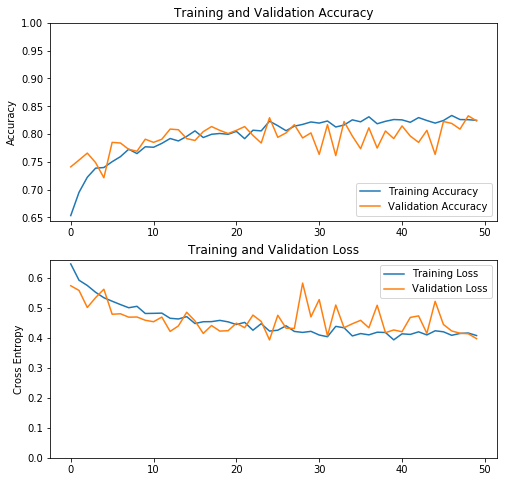

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()


Accuracy achieved: 82-83% after 50 epochs